# Problema de Vuelos
## con búsqueda en amplitud

Al programa le hemos pedido que nos encuentre la mejor secuencia de trasbordos para ir de *Málaga* a *Santiago*, y esta es la propuesta que nos ha hecho:

['Malaga', 'Barcelona', 'Santiago']

Vemos que es una solución óptima (según el objetivo que hemos definido), ya que aunque con tres conexiones hay otras soluciones posibles, no podemos encontrar ninguna con menos de tres.

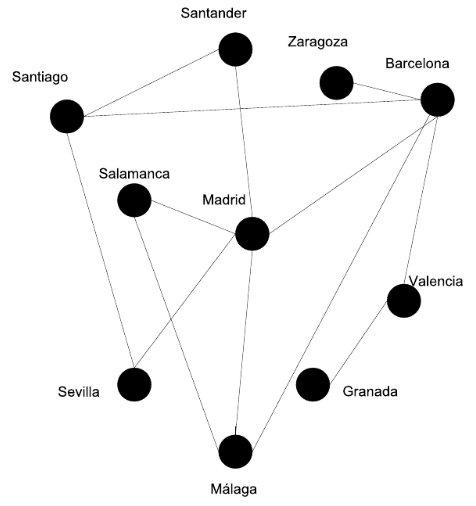

In [ ]:
# Vuelos con búsqueda en amplitud
from arbol import Nodo

def buscar_solucion_BFS(conexiones, estado_inicial, solucion):
  solucionado=False
  nodos_visitados=[]
  nodos_frontera=[]
  nodoInicial = Nodo(estado_inicial)
  nodos_frontera.append(nodoInicial)
  while (not solucionado) and len(nodos_frontera)!=0:
    nodo=nodos_frontera[0]
    # extraer nodo y añadirlo a visitados
    nodos_visitados.append(nodos_frontera.pop(0))
    if nodo.get_datos() == solucion:
      # solución encontrada
      solucionado=True
      return nodo
    else:
      # expandir nodos hijo (ciudades con conexión)
      dato_nodo = nodo.get_datos()
      lista_hijos=[]
      for un_hijo in conexiones[dato_nodo]:
        hijo=Nodo(un_hijo)
        lista_hijos.append(hijo)
        if not hijo.en_lista(nodos_visitados) and not hijo.en_lista(nodos_frontera):
          nodos_frontera.append(hijo)

      nodo.set_hijos(lista_hijos)

Para representar las conexiones, hemos usado la estructura de datos diccionario de python, que nos permite de manera sencilla representar todas las conexiones. A la hora de generar los nodos hijo solo tenemos que obtener los elementos almacenados en el diccionario que corresponde con la ciudad que estamos examinando.

In [ ]:
conexiones = {'Malaga':{'Salamanca', 'Madrid', 'Barcelona'},
              'Sevilla':{'Santiago', 'Madrid'},
              'Granada':{'Valencia'},
              'Valencia':{'Barcelona'},
              'Madrid':{'Salamanca', 'Sevilla', 'Malaga', 'Barcelona','Santander'},
              'Salamanca':{'Malaga', 'Madrid'},
              'Santiago':{'Sevilla', 'Santander', 'Barcelona'},
              'Santander':{'Santiago', 'Madrid'},
              'Zaragoza':{'Barcelona'},
              'Barcelona':{'Zaragoza', 'Santiago', 'Madrid', 'Malaga','Valencia'}
             }
estado_inicial='Malaga'
solucion='Santiago'
nodo_solucion = buscar_solucion_BFS(conexiones, estado_inicial, solucion)

In [ ]:
# mostrar resultado
resultado=[]
nodo=nodo_solucion
while nodo.get_padre() != None:
    resultado.append(nodo.get_datos())
    nodo = nodo.get_padre()
resultado.append(estado_inicial)
resultado.reverse()
print(resultado)